In [1]:
 from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import plotnine as p9

In [2]:
file_tree = OrderedDict({
    "DaG": "../../../disease_gene/disease_associates_gene/model_calibration_experiment/output/dag_calibration.tsv",
    "CtD": "../../../compound_disease/compound_treats_disease/model_calibration_experiment/output/ctd_calibration.tsv",
    "CbG": "../../../compound_gene/compound_binds_gene/model_calibration_experiment/output/cbg_calibration.tsv",
    #"GiG": "../../../gene_gene/gene_interacts_gene/model_calibration_experiment/output/gig_calibration.tsv"
})

In [3]:
calibration_df = pd.DataFrame()
for rel in file_tree:
    calibration_df = (
        calibration_df
        .append(
            pd.read_csv(file_tree[rel], sep="\t")
            .assign(relation=rel)
        )
        .reset_index(drop=True)
    )

In [4]:
color_map = {
    "before": mcolors.to_hex(pd.np.array([178,223,138, 255])/255),
    "after": mcolors.to_hex(pd.np.array([31,120,180, 255])/255)
}

/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/utils

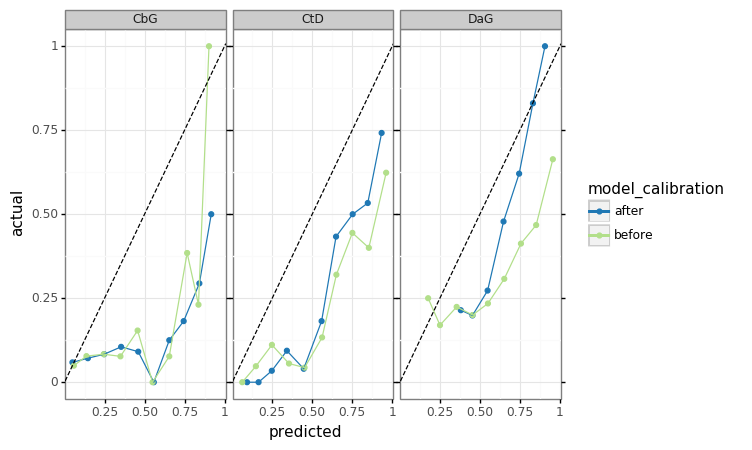

<ggplot: (-9223363254565505732)>


/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../model_calibration.png
  warn('Filename: {}'.format(filename))
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/danich1/anaconda3/envs/snorkeling/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/danich1/anaconda3/envs/snorkeling/lib/python3

In [5]:
g = (
    p9.ggplot(calibration_df, p9.aes(x="predicted", y="actual", color="model_calibration"))
    + p9.geom_point()
    + p9.geom_path()
    + p9.geom_abline(p9.aes(slope=1, intercept=0), linetype='dashed', color='black')
    + p9.scale_color_manual(values={
        "before":color_map["before"],
        "after":color_map["after"]
    })
    + p9.facet_wrap("relation")
    + p9.theme_bw()
)
print(g)
g.save(filename="../model_calibration.png", dpi=300)